***Question 1:
IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.
Find the count of each genre present in IMDB movie dataset?
Print the Genre and number of movies present in that genre.
Note: Ignore the empty value present in genre.***

In [14]:
import sqlite3
import pandas as pd

db=sqlite3.connect("IMDB.sqlite")

file_data=pd.read_sql_query("Select * from genre",db)
df=file_data["genre"]
df.dropna(inplace=True)
idx=df[df==""].index
df.drop(idx,inplace=True)
genre_count=df.value_counts()
genre_name=genre_count.index
number_of_movie=genre_count.values

for i in range(len(genre_name)):
    print(genre_name[i],number_of_movie[i])

Drama 77
Adventure 43
Action 33
Comedy 31
Biography 21
Sci-Fi 18
Thriller 14
Animation 13
Romance 13
Crime 11
Fantasy 7
Mystery 7
History 6
Sport 3
Music 3
Family 3
Horror 2
Western 2
War 2
Musical 1


***question 2:
IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.
Find the highest-grossing movie (i.e domestic earning + worldwide earning) in IMDB database.
Print the rating of that movie.***

In [239]:
import sqlite3
import pandas as pd

db=sqlite3.connect("IMDB.sqlite")

imbd=pd.read_sql_query("Select * from IMDB",db)
earnings=pd.read_sql_query("Select * from earning",db)

earnings["Total"]=sum(earnings["Domestic"],earnings["Worldwide"])
earnings["Movie_id"]=pd.to_numeric(earnings["Movie_id"])
highest_earning=max(earnings["Total"])
movie_id=earnings[earnings["Total"]==highest_earning]["Movie_id"].values[0]


imbd["Movie_id"]=pd.to_numeric(imbd["Movie_id"])
idx=imbd[imbd["Movie_id"]==movie_id]
rating=idx["Rating"].values[0]
print(rating)


8.1


***question 3:
IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.
Find the most voted movie in IMDB Movie Database.
Print the movie name and the rating of that movie.***

In [64]:
import sqlite3
import pandas as pd

db=sqlite3.connect("IMDB.sqlite")

imdb=pd.read_sql_query("Select * from IMDB",db)
movie_name=imdb[imdb["TotalVotes"]==max(imdb["TotalVotes"])]["Title"].values[0]
movie_rating=imdb[imdb["TotalVotes"]==max(imdb["TotalVotes"])]["Rating"].values[0]
print(movie_name,movie_rating)

Inception (2010) 8.8


***Question 4:
IMDB.sqlite database contains all details of movies and has three tables with name IMDB, genre and earning.
Find the Movie with Longest-Running Time from IMDB Movie database.
Print the name of movie and running time as integer value.***

In [103]:
import sqlite3
import pandas as pd

db=sqlite3.connect("IMDB.sqlite")

imdb=pd.read_sql_query("Select * from IMDB",db)

imdb["Runtime"].replace("","0",inplace=True)
imdb["Runtime"]=imdb["Runtime"].apply(lambda x: int(str(x).replace("min"," ")))
imdb["Runtime"]=pd.to_numeric(imdb["Runtime"])
movie_name=imdb[imdb["Runtime"]==max(imdb["Runtime"])]["Title"].values[0]
runtime=imdb[imdb["Runtime"]==max(imdb["Runtime"])]["Runtime"].values[0]
print(movie_name,runtime)


The Wolf of Wall Street (2013) 180


***Question 5:
IMDB.sqlite database contains all details of movies and has three tables with name IMDB, genre and earning.
Find the movie which has maximum net profit in IMDB Movie Database.
Print the movie name.
Note: Net Profit= Total Earning(Domestic+WorldWide earning) - budget***

In [117]:
import sqlite3
import pandas as pd

db=sqlite3.connect("IMDB.sqlite")

imdb=pd.read_sql_query("Select * from IMDB",db)
earnings=pd.read_sql_query("Select * from earning",db)
imdb_earning=pd.merge(imdb,earnings,on="Movie_id")
imdb_earning["Domestic"].replace("",0,inplace=True)
imdb_earning["Worldwide"].replace("",0,inplace=True)
imdb_earning["Budget"].replace("",0,inplace=True)
imdb_earning["Budget"]=imdb_earning["Budget"].apply(lambda x:int(float(x)))
imdb_earning["Net_profit"]=(imdb_earning["Domestic"]+imdb_earning["Worldwide"])-imdb_earning["Budget"]
movie_name=imdb_earning[imdb_earning["Net_profit"]==max(imdb_earning["Net_profit"])]["Title"].values[0]
print(movie_name)

Star Wars: The Force Awakens (2015)


***Question 6:
IMDB.sqlite database contains all details of movies and has three tables with name IMDB, genre and earning.
Find the least budgeted movie in IMDB Movie Database.
If there is more than one least budgeted movies then print the movie which has maximum net profit.
Note: Net Profit= Total Earning(Domestic+WorldWide earning) - budget***

In [142]:
import sqlite3
import pandas as pd

db=sqlite3.connect("IMDB.sqlite")

imdb=pd.read_sql_query("Select * from IMDB",db)
earnings=pd.read_sql_query("Select * from earning",db)

imdb_earning=pd.merge(imdb,earnings,on="Movie_id")
imdb_earning["Domestic"].replace("",0,inplace=True)
imdb_earning["Worldwide"].replace("",0,inplace=True)

idx=imdb_earning[imdb_earning["Budget"]==""].index
imdb_earning.drop(idx,inplace=True)


imdb_earning["Budget"]=imdb_earning["Budget"].apply(lambda x:int(float(x)))
imdb_earning["Net_profit"]=(imdb_earning["Domestic"]+imdb_earning["Worldwide"])-imdb_earning["Budget"]
least_budget=imdb_earning[imdb_earning["Budget"]==min(imdb_earning["Budget"])]["Net_profit"].values
least_budget_maximum_profit=max(least_budget)
movie_name=movie_name=imdb_earning[imdb_earning["Net_profit"]==least_budget_maximum_profit]["Title"].values[0]
print(movie_name)



Short Term 12 (2013)


***Question 7:
IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.
Find the highest-grossing movie (i.e domestic earning + worldwide earning) in IMDB database year wise.
Print the Year and name of the movie which was the highest grosser in that year.
Note:Print the year in ascending order.***

In [193]:
import sqlite3
import pandas as pd
db=sqlite3.connect("IMDB.sqlite")

imdb=pd.read_sql_query("Select * from IMDB",db)
earnings=pd.read_sql_query("Select * from earning",db)
imdb_earning=pd.merge(imdb,earnings,on="Movie_id")
def separateYear(name):
    name=name.split("(")[1]
    return name    
imdb_earning["Year"]=imdb_earning["Title"].apply(lambda x:str(str(x).replace(")","")))
imdb_earning["Year"]=imdb_earning["Year"].apply(separateYear)
imdb_earning["Year"].replace("The Unexpected Virtue of Ignorance\xa0","2014",inplace=True)

imdb_earning["Year"]=imdb_earning["Year"].apply(lambda x: int(str(x)))
imdb_earning["Gross"]=imdb_earning["Domestic"]+imdb_earning["Worldwide"]
year_wise=imdb_earning.groupby("Year")["Gross"].max()
year=year_wise.index
income=year_wise.values

for i in range(len(year)):
    movie_name=imdb_earning[(imdb_earning["Year"]==year[i]) & (imdb_earning["Gross"]==income[i])]["Title"].values[0]
    print(year[i],movie_name)

2010 Toy Story 3 (2010)
2011 Rise of the Planet of the Apes (2011)
2012 The Avengers (2012)
2013 The Hunger Games: Catching Fire (2013)
2014 Guardians of the Galaxy (2014)
2015 Star Wars: The Force Awakens (2015)
2016 Rogue One (2016)


***Question 8:
IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.
Find out the percentage of the budget for each genre in IMDB Movie Dataset?Plot the pie chart.
Print the genre and percentage of movies budget present in that genre with 2 decimal place after rounding off..
Note: Movies has multiple genres, so calculate the percentage for each genre.Replace empty budget column to zero. Top 10***

Adventure 27.09
Action 19.41
Drama 11.71
Sci-Fi 11.63
Animation 8.27
Comedy 7.79
Fantasy 4.90
Thriller 4.31
Biography 2.80
Mystery 2.10


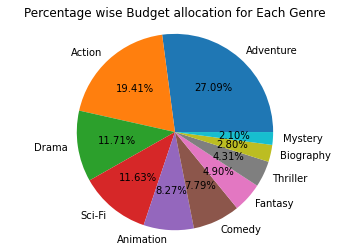

In [230]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

db=sqlite3.connect("IMDB.sqlite")

imdb=pd.read_sql_query("Select * from IMDB",db)
genre=pd.read_sql_query("Select * from genre",db)

imdb_genre=pd.merge(imdb,genre,on="Movie_id")
idx=imdb_genre[imdb_genre["genre"]==""].index
imdb_genre.drop(idx,inplace=True)

imdb_genre["Budget"].replace("",0,inplace=True)
imdb_genre["Budget"]=imdb_genre["Budget"].apply(lambda x:int(float(x)))

genre_counts=imdb_genre.groupby("genre")["Budget"].sum().sort_values(ascending=False)[0:10]
genre_=genre_counts.index
budget=genre_counts.values

x=np.true_divide(budget,budget.sum())*100
for i in range(len(genre_)):
    print(genre_[i],format(x[i],'.2f'))

plt.pie(budget,labels=genre_,autopct="%.2f%%")
plt.title("Percentage wise Budget allocation for Each Genre")
plt.axis("equal")
plt.show()

***Question 9:
IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.
Find out the percentage of the total earning for each genre in IMDB Movie Dataset?Plot the pie chart.
Print the genre and percentage of movies total earning present in that genre with 2 decimal place after rounding off.
Note: Movies has multiple genres, so calculate the percentage for each genre.Total Earning=Domestic earning + WorldWide earning. Top 10***

Adventure 25.38
Action 19.29
Drama 12.88
Sci-Fi 10.71
Comedy 8.28
Animation 7.29
Fantasy 5.55
Thriller 4.76
Biography 3.68
Mystery 2.17


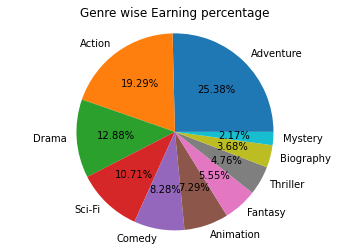

In [233]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

db=sqlite3.connect("IMDB.sqlite")
earning=pd.read_sql_query("Select * from earning",db)
genre=pd.read_sql_query("Select * from genre",db)

earning_genre=pd.merge(earning,genre,on="Movie_id")
idx=earning_genre[earning_genre["genre"]==""].index
earning_genre.drop(idx,inplace=True)

earning_genre["Domestic"].replace("",0,inplace=True)
earning_genre["Worldwide"].replace("",0,inplace=True)

earning_genre["Earning"]=earning_genre["Domestic"]+earning_genre["Worldwide"]
genre_counts=earning_genre.groupby("genre")["Earning"].sum().sort_values(ascending=False)[0:10]
genre_=genre_counts.index
earning_=genre_counts.values

x=np.true_divide(earning_,earning_.sum())*100
for i in range(len(genre_)):
    print(genre_[i],format(x[i],".2f"))
    
plt.pie(earning_,labels=genre_,autopct="%.2f%%")
plt.title("Genre wise Earning percentage")
plt.axis("equal")
plt.show()



***Question 10:
IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.
Find the movie which has genre of 'Sci-Fi' and 'Mystery' and movie rating is greater or equal to 8 from IMDB Movie Database.
Print the movie name.
Movies has multiple genre.***

In [280]:
import sqlite3
import pandas as pd

db=sqlite3.connect("IMDB.sqlite")

imdb=pd.read_sql_query("Select * from IMDB",db)
genre=pd.read_sql_query("Select * from genre",db)

imdb_genre=pd.merge(imdb,genre,on="Movie_id")
data=imdb_genre[(imdb_genre["genre"]=="Sci-Fi") | (imdb_genre["genre"]=="Mystery") & (imdb_genre["Rating"]>=8)]["Movie_id"].values[0]
movie_name=imdb_genre[imdb_genre["Movie_id"]==data]["Title"].values[0]
print(movie_name)

Arrival (2016)
